In [3]:
!git clone https://github.com/RajamannarAanjaram/EVA-6.git

fatal: destination path 'EVA-6' already exists and is not an empty directory.


In [4]:
!pip install -U albumentations

Requirement already up-to-date: albumentations in /usr/local/lib/python3.7/dist-packages (1.0.0)


In [6]:
%cd EVA-6/
!ls

/content/EVA-6
data  LICENSE  main.py	__pycache__  src  utils  work1.ipynb


In [1]:
from utils.DataLoader import Loader
from src.models import *
from src.optimise import *
from src.plots import Plots
import matplotlib.pyplot as plt

In [8]:
loader = Loader(batch_size=64)
train_transform,test_transform = loader.transform()
train_data,test_data = loader.Loader(train_transform,test_transform, cuda=False)



======> Computing mean and std of dataset
Files already downloaded and verified


100%|██████████| 390/390 [00:05<00:00, 76.09it/s] 


Files already downloaded and verified
Files already downloaded and verified


In [9]:
model, summary = ModelLoader.modelsummary(version=[2,2,2,2],inputsize=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [10]:
use_cuda = torch.cuda.is_available()
device = 'cuda:0' if use_cuda else 'cpu'

In [11]:
(train_acc, train_losses, test_acc, test_losses), modelfinal = learner(model,train_data,test_data,2,device)

Loss=2.3160269260406494 Batch_id=0 Accuracy=12.50:   0%|          | 1/274 [00:00<00:29,  9.12it/s]

Epoch 1:


Loss=1.899274230003357 Batch_id=273 Accuracy=19.71: 100%|██████████| 274/274 [00:26<00:00, 10.23it/s]
Loss=1.8245261907577515 Batch_id=1 Accuracy=29.69:   1%|          | 2/274 [00:00<00:26, 10.19it/s]


Test set: Average loss: 1.8016, Accuracy: 16210/50000 (32.42%)

Epoch 2:


Loss=1.5320833921432495 Batch_id=273 Accuracy=35.43: 100%|██████████| 274/274 [00:26<00:00, 10.15it/s]



Test set: Average loss: 1.5321, Accuracy: 21680/50000 (43.36%)



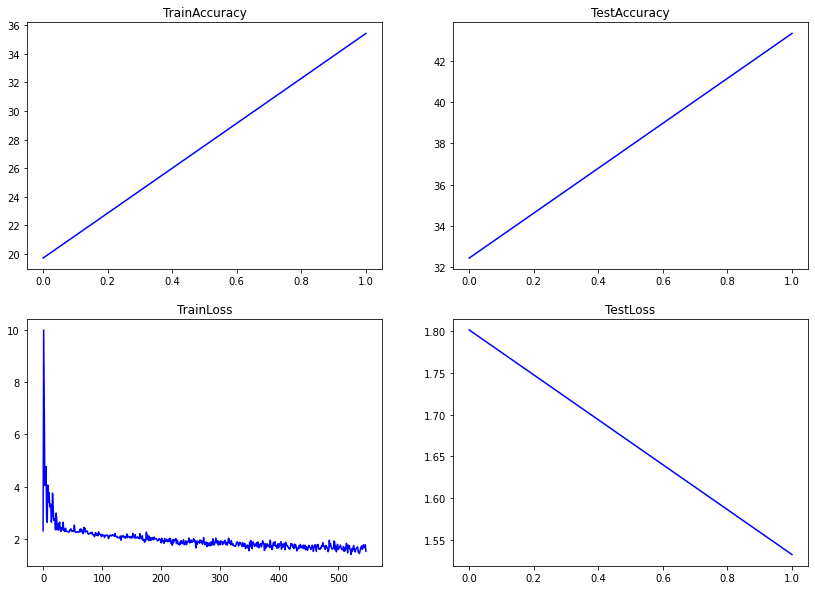

In [12]:
Plots.stat_graph(train_acc, train_losses, test_acc, test_losses)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Total wrong predictions are 28320


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

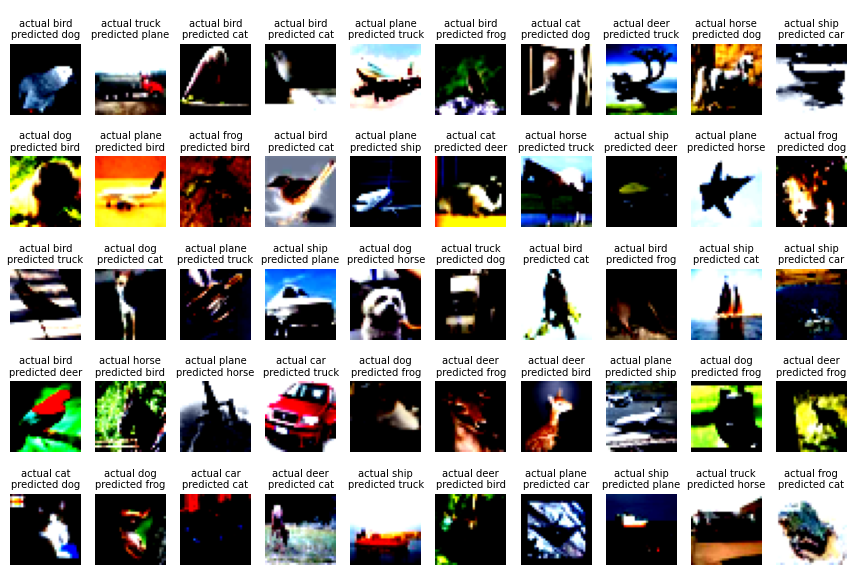

In [13]:
Plots.miscImages(modelfinal,test_data,device)
plt.show()

In [14]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_data:
        images, labels = data
        images = images["image"].to(device)
        labels = labels.to(device)
        outputs = modelfinal(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 44 %
Accuracy of   car : 43 %
Accuracy of  bird : 38 %
Accuracy of   cat : 22 %
Accuracy of  deer : 20 %
Accuracy of   dog : 29 %
Accuracy of  frog : 66 %
Accuracy of horse : 50 %
Accuracy of  ship : 57 %
Accuracy of truck : 66 %
